In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
%matplotlib notebook

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.
Save your animation to a file and embed the created file.

In [1]:
#create function first
x = np.linspace(0, 2*np.pi, 100)
t = np.linspace(0, 100, 100)
y = lambda x,t: np.sin(x + t/10)

#follow the example given in lab manual to animate function:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-.1,2*np.pi + 0.1))   #change limits on x to reflect the sin function
ax.set_ylim((-1.5,1.5))            #change limits on y to reflect the sin function
particle, = plt.plot([],[], marker='o', color='purple')
traj, = plt.plot([],[], color='deeppink', alpha=0.5)    #all of this code is for creating the graph that the animation will be on
plt.title("Function f over time (seconds)")

def update(i):
    traj.set_data(x,y(x, t[i])) #only want y as t changes
    return traj

#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob1_animation.mp4') #save animation as file

plt.show()


NameError: name 'np' is not defined

#dipslay the video from the file now
<video src="prob1_animation.mp4" controls>

# Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


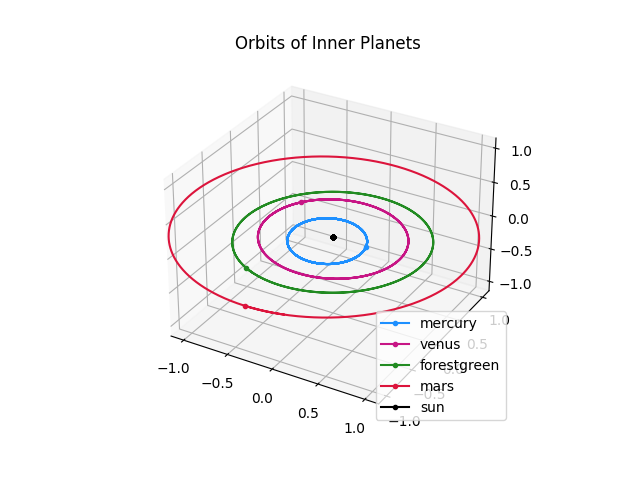

In [5]:
orbits = np.load('orbits.npz')  #load data for 4 planets' orbits from file
sun = np.zeros(1400)            #1400 is the length of the arrays

#make the 3D plot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   #create 3D axis object using add_subplot()
ax.set_xlim((-1.1, 1.1))   #change limits on x,y,z to reflect figure 1.1 that it's supposed to match
ax.set_ylim((-1.1,1.1))    
ax.set_zlim((-1.1, 1.1))   

#now plot the x, y, z columns for all 4 planets and the points on the lines and the sun:
ax.plot(orbits["mercury"][:,0], orbits["mercury"][:,1], orbits["mercury"][:,2], color = "dodgerblue") 
ax.plot(orbits["mercury"][0,0], orbits["mercury"][0,1], orbits["mercury"][0,2], marker = ".", color = "dodgerblue", label = "mercury") #get the points on the lines that fig 1.1 has
ax.plot(orbits["venus"][:, 0], orbits["venus"][:,1], orbits["venus"][:,2], color = "mediumvioletred")
ax.plot(orbits["venus"][0, 0], orbits["venus"][0,1], orbits["venus"][0,2], marker = ".", color = "mediumvioletred", label = "venus")
ax.plot(orbits["earth"][:, 0], orbits["earth"][:,1], orbits["earth"][:,2], color = "forestgreen")
ax.plot(orbits["earth"][0, 0], orbits["earth"][0,1], orbits["earth"][0,2], marker = ".", color = "forestgreen", label = "forestgreen")
ax.plot(orbits["mars"][:, 0], orbits["mars"][:,1], orbits["mars"][:,2], color = "crimson")
ax.plot(orbits["mars"][0, 0], orbits["mars"][0,1], orbits["mars"][0,2], marker = ".", color = "crimson", label = "mars")
ax.plot(sun, sun, sun, marker = ".", color = "black", label = "sun")  #plot the sun
plt.legend(loc = "best")
plt.title("Orbits of Inner Planets")

plt.show()


## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot, and embed you animated plot.

<IPython.core.display.Javascript object>


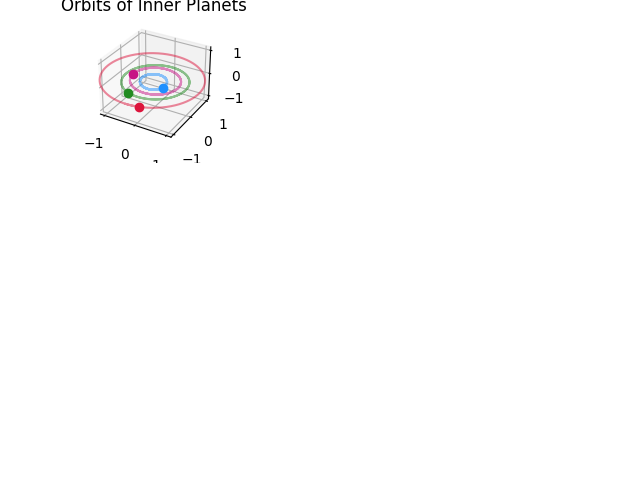

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-1.1, 1.1))   #change limits on x,y,z to reflect figure 1.1 that it's supposed to match
ax.set_ylim((-1.1,1.1))    
ax.set_zlim((-1.1, 1.1))  

#set up the particles, trajectories for all 4 planets: change them all to be 3D
earth_particle, = plt.plot([],[],[], marker='o', color='forestgreen', label = "earth")
earth_traj, = plt.plot([],[],[], color='forestgreen', alpha=0.5)    
mars_particle, = plt.plot([],[],[], marker='o', color='crimson', label = "mars")
mars_traj, = plt.plot([],[],[], color='crimson', alpha=0.5)
venus_particle, = plt.plot([],[],[], marker='o', color='mediumvioletred', label = "venus")
venus_traj, = plt.plot([],[],[], color='mediumvioletred', alpha=0.5)
merc_particle, = plt.plot([],[],[], marker='o', color='dodgerblue', label = "mercury")
merc_traj, = plt.plot([],[],[], color='dodgerblue', alpha=0.5)
plt.title("Orbits of Inner Planets")

#get the part, traj coordinates for the animation in the update function:
def update(i):
    earth_particle.set_data(orbits["earth"][:,0][i],orbits["earth"][:,1][i]) #set the x, y part coords w/ set_data
    earth_particle.set_3d_properties(orbits["earth"][:,2][i]) #set z part coord w/ set_3d_prop
    earth_traj.set_data(orbits["earth"][:,0][:i+1],orbits["earth"][:,1][:i+1]) #x,y trajectory for earth
    earth_traj.set_3d_properties(orbits["earth"][:,2][:i+1]) #z traj for earth
    
    #get x,y,z part and traj for mars:
    mars_particle.set_data(orbits["mars"][:,0][i],orbits["mars"][:,1][i]) #set the x, y part coords w/ set_data
    mars_particle.set_3d_properties(orbits["mars"][:,2][i]) #set z part coord w/ set_3d_prop
    mars_traj.set_data(orbits["mars"][:,0][:i+1],orbits["mars"][:,1][:i+1]) #x,y trajectory for earth
    mars_traj.set_3d_properties(orbits["mars"][:,2][:i+1]) #z traj for earth
    
    #get x,y,z part and traj for venus:
    venus_particle.set_data(orbits["venus"][:,0][i],orbits["venus"][:,1][i]) #set the x, y part coords w/ set_data
    venus_particle.set_3d_properties(orbits["venus"][:,2][i]) #set z part coord w/ set_3d_prop
    venus_traj.set_data(orbits["venus"][:,0][:i+1],orbits["venus"][:,1][:i+1]) #x,y trajectory for earth
    venus_traj.set_3d_properties(orbits["venus"][:,2][:i+1]) #z traj for earth
    
    #get x,y,z part and traj for mercury:
    merc_particle.set_data(orbits["mercury"][:,0][i],orbits["mercury"][:,1][i]) #set the x, y part coords w/ set_data
    merc_particle.set_3d_properties(orbits["mercury"][:,2][i]) #set z part coord w/ set_3d_prop
    merc_traj.set_data(orbits["mercury"][:,0][:i+1],orbits["mercury"][:,1][:i+1]) #x,y trajectory for earth
    merc_traj.set_3d_properties(orbits["mercury"][:,2][:i+1]) #z traj for earth
    
    return earth_particle,earth_traj,mars_particle,mars_traj,venus_particle,venus_traj,merc_particle,merc_traj

#now get the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(1400), interval=10) #array 1400 long so make frames 1400
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob3_animation.mp4') #save animation as file

plt.show()

#dipslay the video from the file now 
<video src="prob2_animation.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

In [9]:
#first make meshgrid for X, Y:
x = np.linspace(-5, 5, 100) #this is based off of graph for prob 4 answer given in lab manual
y = np.linspace(-5, 5, 100) #meshgrid is 100 x 100 bc made linspace is length 100

X, Y = np.meshgrid(x, y) #X, Y both matrices of x, y coord
Z = np.zeros((100,100)) #meshgrid is 100x100 so initialize as 100x100 matrix of 0s and then fill it

#make function:
sigma = np.array([[1,3/5],[3/5,2]]) #make sigma matrix
mu = np.array([0,0])

f = lambda x: (1/(np.sqrt(np.linalg.det(2*np.pi*sigma))))*(np.exp(-0.5*((x-mu).T)@(np.linalg.inv(sigma)@(x-mu))))

#now have to populate Z matrix, Z is f evaluated at every point in meshgrid
i = 0
for i in range(len(Z)):           #loop through all rows
    for j in range(len(Z[0])):    #loop through number of columns
        Z[i,j] = f(np.array([X[i,j], Y[i,j]])) #x is [x,y] which is why need X,Y here

#make the 3D surface plot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   #create 3D axis object using add_subplot()

ax.plot_surface(X, Y, Z, cmap = "cubehelix")     #create 3D surface plot
plt.title("Bivariate normal density function surface plot")

plt.show()


<IPython.core.display.Javascript object>

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation and embed it in the notebook.

In [ ]:
vibes = np.load('vibration.npz') #load in data

#get X,Y,Z data from vibes data
X = vibes['X']
Y = vibes['Y']
Z = vibes['Z'] 

#create the animation:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title("solution to wave equation for an elastic rectangular membrane")

def update(i):
    ax.clear() #need to clear it each time or else it will NEVER EVER stop
    #now need to set limits for each one since just cleared it:
    ax.set_xlim((0, 3)) #limits come from equation given in problem
    ax.set_ylim((0,2))
    ax.set_zlim((0,5))
    ax.plot_surface(X, Y, Z[i], cmap = "cubehelix") #plot it bc resetting it everytime. Z has height at given time and want all info at time i, so need Z[i]
    return ax #everything is being done to ax, so want to return it
    
#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob5_animation.mp4') #save animation as file

plt.show()

<IPython.core.display.Javascript object>

#dipslay the video from the file now
<video src="prob5_animation.mp4" controls>